
# Exploratory data analysis


## Table of contents

0. [Introduction](#Introduction)
1. [Import of packages](#Packages)
2. [Import of data](#Data)
    1. [Adjusting the dataframe to enhance analyses](#Adjusting)
    2. [Spliting the dataframe](#Spliting)
    3. [Saving of the data](#Saving)
3. [Functions definitions](#Functions)
    1. [Initial informations ](#Initial)
    2. [Overview](#Overview)
    3. [Target proportion](#ProportionFunction)
    4. [Variables distributions](#DistributionsFunction)
4. [Exploratory Data Analysis Results](#EDAResults)
    1. [Initial informations ](#InitialResults)
    2. [Overview](#OverviewResults)
    3. [Target proportion](#ProportionResults)
    4. [Variables distributions](#DistributionsResults)


<section id="Introduction">
    <h2> 0. Introduction </h2>
</section>


This is a file with functions that aim to facilitate exploratory data analysis. As output, the functions provide graphs, metrics, and basic tables commonly used in the analysis process. Pay attention to the function parameters:

- **df_origin**: single pandas dataframe;

<br>

- **X_train**: pandas train dataframe;
- **X_test**: pandas test dataframe;
- **X_validation**: pandas validation dataframe;

<br>

- **y_train**: train target;
- **y_test**: test target;
- **y_validation**: validation target;


---



<section id="Packages">
    <h2> 1. Import of packages </h2>
</section>


In [8]:
#!pip install

In [9]:
from sklearn.datasets import load_breast_cancer

from fast_ml import eda
from fast_ml.model_development import train_valid_test_split
from fast_ml.utilities import reduce_memory_usage, display_all

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle # pickle
import pyarrow

# interative interface
import ipywidgets as widgets
from IPython.display import display


<section id="Data">
    <h2> 2. Import of data </h2>
</section>


In [12]:
X_origin, y_origin = load_breast_cancer(return_X_y=True, as_frame=True)

In [13]:
y_dataframe = pd.DataFrame(y_origin, columns=['target'])

In [14]:
df_origin = pd.concat([X_origin, y_dataframe], axis=1)

In [15]:
df_origin

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0



<section id="Adjusting">
    <h3> 2.1. Adjusting the dataframe to enhance analyses </h3>
</section>



<section id="MissingAdjusting">
    <h4> 2.1.1. Missing </h4>
</section>


In [18]:
num_rows, num_columns = df_origin.shape
missing_percent = 0.11
missing_num = int(num_rows * num_columns * missing_percent)

affected_rows = np.random.randint(0, num_rows, missing_num)
affected_columns = np.random.randint(0, num_columns, missing_num)

for row, column in zip(affected_rows, affected_columns):
    df_origin.iat[row, column] = np.nan


In [19]:
df_origin_missing = df_origin[df_origin['target'].notna()]

In [20]:
df_origin_missing

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,NaN,0.07864,0.08690,0.07017,0.1812,NaN,...,23.41,NaN,1956.0,NaN,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,NaN,0.14440,0.42450,NaN,0.2430,0.3613,NaN,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,NaN,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,NaN,0.19800,NaN,0.1809,0.05883,...,NaN,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,NaN,0.0
565,20.13,28.25,NaN,1261.0,0.09780,0.10340,0.14400,NaN,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,NaN,0.0
566,16.60,28.08,108.30,858.1,NaN,0.10230,0.09251,NaN,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,NaN,0.0



<section id="DuplicatesAdjusting">
    <h4> 2.1.1. Duplicates </h4>
</section>


In [22]:
num_duplicates = 555

random_index = np.random.choice(df_origin_missing.index, num_duplicates, replace=True)

duplicates = df_origin_missing.loc[random_index]

df_origin_missing_duplicate = pd.concat([df_origin_missing, duplicates])

df_origin_missing_duplicate.reset_index(drop=True, inplace=True)

In [23]:
df_origin_missing_duplicate

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,NaN,0.07864,0.08690,0.07017,0.1812,NaN,...,23.41,NaN,1956.0,NaN,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,NaN,0.1444,0.4245,NaN,0.2430,0.3613,NaN,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,NaN,0.19800,NaN,0.1809,0.05883,...,NaN,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,18.46,18.52,121.10,1075.0,0.09874,0.10530,0.13350,0.08795,0.2132,0.06022,...,27.68,152.20,1603.0,0.1398,0.2089,0.3157,NaN,0.3695,NaN,0.0
1060,18.25,19.98,NaN,1040.0,0.09463,0.10900,0.11270,NaN,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,NaN,NaN,0.3063,0.08368,0.0
1061,19.10,26.29,NaN,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224,...,32.72,141.30,1298.0,0.1392,0.2817,0.2432,0.1841,0.2311,0.09203,0.0
1062,13.61,24.69,87.76,NaN,0.09258,0.07862,0.05285,0.03085,0.1761,NaN,...,35.64,113.20,848.7,0.1471,0.2884,0.3796,0.1329,0.3470,0.07900,0.0



<section id="Spliting">
    <h3> 2.2. Spliting the dataframe </h3>
</section>


In [25]:
X_train, y_train, X_validation, y_validation, X_test, y_test = train_valid_test_split(
                                                        df_origin_missing,
                                                        target = 'target',
                                                        train_size=0.8,
                                                        valid_size=0.1,
                                                        test_size=0.1)


<section id="Saving">
    <h3> 2.3. Saving of the data </h3>
</section>


In [38]:
X_train.to_parquet('X_train.parquet', index=False)
X_test.to_parquet('X_test.parquet', index=False)
X_validation.to_parquet('X_validation.parquet', index=False)

In [40]:
y_train = pd.DataFrame(y_train)
y_train.to_parquet('y_train.parquet', index=False)

y_test = pd.DataFrame(y_test)
y_test.to_parquet('y_test.parquet', index=False)

y_validation = pd.DataFrame(y_validation)
y_validation.to_parquet('y_validation.parquet', index=False)


---



<section id="Functions">
    <h2> 3. Functions definitions </h2>
</section>



<section id="Initial">
    <h3> 3.1. Initial informations </h3>
</section>


In [191]:
def eda_initial_informations(df):
    
    num_rows, num_columns = df.shape
    index = df.index
    
    print('Number of rows:', num_rows)
    print('Number of columns:', num_columns)
    print('Index:', index)


<section id="Overview">
    <h3> 3.2. Overview </h3>
</section>


In [45]:
 def eda_overview(df):
    summary_df = eda.df_info(df)
    display_all(summary_df)

In [47]:
def eda_summary_table(df):
    num_missing = df.isnull().sum()
    percent_missing = (num_missing / len(df) * 100)
    percent_missing = percent_missing.round().astype(int)
    formats = df.dtypes
    types = formats.apply(lambda x: 
        'Numeric' if x in ['float64', 'int64'] else 
        'Categorical' if x == 'object' else 
        'Datetime' if x == 'datetime64[ns]' else 'Outro'
    )    
    
    num_occurrences = df.apply(lambda x: len(x.unique()))
    
    missing_table = pd.DataFrame({
        'Number of missing': num_missing,
        'Percent of missing (%)': percent_missing,
        'Number of occurrences': num_occurrences,
        'Format': formats,
        'Type': types
    })
    
    return missing_table




<section id="ProportionFunction">
    <h3> 3.3. Target proportion </h3>
</section>


In [102]:
def eda_target_distribution(original_series, train_series, test_series, validation_series):
    labels = ['Class 0', 'Class 1']  # Defina os rótulos apropriados para suas classes
    
    # Crie subplots para os quatro gráficos de pizza
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle('Target Distribution Comparison', fontsize=16)
    axes = axes.flatten()

    series_data = [original_series, train_series, test_series, validation_series]
    titles = ['Original Series', 'Train Series', 'Test Series', 'Validation Series']
    
    for ax, data, title in zip(axes, series_data, titles):
        class_counts = [len(data[data == 0]), len(data[data == 1])]  # Calcule a contagem de classes 0 e 1
        
        wedges, texts, autotexts = ax.pie(class_counts, labels=labels, startangle=90, colors=['palegreen', 'lightcoral'],
                                          wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%')
        ax.axis('equal')  # Proporção igual para garantir que o gráfico de pizza seja um círculo
        ax.set_title(title)

        # Adicione o número absoluto das classes aos rótulos
        for autotext, count in zip(autotexts, class_counts):
            autotext.set(size=12, fontweight='bold')
            autotext.set_text(f'{count}\n({autotext.get_text()})')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


<section id="DistributionsFunction">
    <h3> 3.4. Variables distributions </h3>
</section>


In [150]:
def eda_variables_distributions(dataframe1, dataframe2, n_start, n_end):
    if n_end <= n_start:
        print('Error: n_end must be greater than n_start.')
        return
    
    variables = dataframe1.columns[n_start:n_end]
    num_variables = len(variables)
    
    if num_variables <= 0:
        print('Error: Invalid range of columns.')
        return
    
    num_cols = 2
    num_rows = (num_variables + 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
    
    if num_rows == 1 and num_cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for i, var in enumerate(variables):
        axes[i].hist(dataframe1[var], bins=20, color='skyblue', alpha=0.5, label='Dataframe 1', log=True)
        axes[i].hist(dataframe2[var], bins=20, color='orange', alpha=0.5, label='Dataframe 2', log=True)
        axes[i].set_title(var + ' Histogram')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Exemplo de uso:
# eda_variables_distributions(dataframe1, dataframe2, n_start, n_end)



---



<section id="EDAResults">
    <h2> 4. Exploratory Data Analysis Results </h2>
</section>



<section id="InitialResults">
    <h3> 4.1. Initial informations </h3>
</section>


In [193]:
eda_initial_informations(df_origin)

Number of rows: 569
Number of columns: 31
Index: RangeIndex(start=0, stop=569, step=1)



<section id="OverviewResults">
    <h3> 4.2. Overview </h3>
</section>


In [168]:
eda_overview(df_origin)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
mean radius,float64,Numerical,422,"[17.99, 20.57, 19.69, 11.42, 20.29, 12.45, 18....",49,8.611599
mean texture,float64,Numerical,443,"[10.38, 17.77, 21.25, 20.38, 14.34, 15.7, 19.9...",49,8.611599
mean perimeter,float64,Numerical,476,"[122.8, 132.9, 130.0, 77.58, 135.1, 82.57, nan...",55,9.666081
mean area,float64,Numerical,483,"[1001.0, 1326.0, 1203.0, 386.1, 1297.0, 477.1,...",66,11.599297
mean smoothness,float64,Numerical,423,"[0.1184, nan, 0.1096, 0.1425, 0.1003, 0.1278, ...",68,11.950791
mean compactness,float64,Numerical,475,"[0.2776, 0.07864, 0.1599, 0.2839, nan, 0.17, 0...",66,11.599297
mean concavity,float64,Numerical,468,"[0.3001, 0.0869, 0.1974, 0.2414, 0.198, 0.1578...",75,13.181019
mean concave points,float64,Numerical,484,"[0.1471, 0.07017, 0.1279, 0.1052, nan, 0.08089...",66,11.599297
mean symmetry,float64,Numerical,403,"[0.2419, 0.1812, 0.2069, 0.2597, 0.1809, 0.208...",58,10.193322
mean fractal dimension,float64,Numerical,451,"[0.07871, nan, 0.05999, 0.09744, 0.05883, 0.07...",65,11.42355


In [165]:
eda_summary_table(df_origin)

,Number of missing,Percent of missing (%),Number of occurrences,Format,Type
mean radius,49,9,423,float64,Numeric
mean texture,49,9,444,float64,Numeric
mean perimeter,55,10,477,float64,Numeric
mean area,66,12,484,float64,Numeric
mean smoothness,68,12,424,float64,Numeric
mean compactness,66,12,476,float64,Numeric
mean concavity,75,13,469,float64,Numeric
mean concave points,66,12,485,float64,Numeric
mean symmetry,58,10,404,float64,Numeric
mean fractal dimension,65,11,452,float64,Numeric



<section id="ProportionResults">
    <h3> 4.3. Target proportion </h3>
</section>


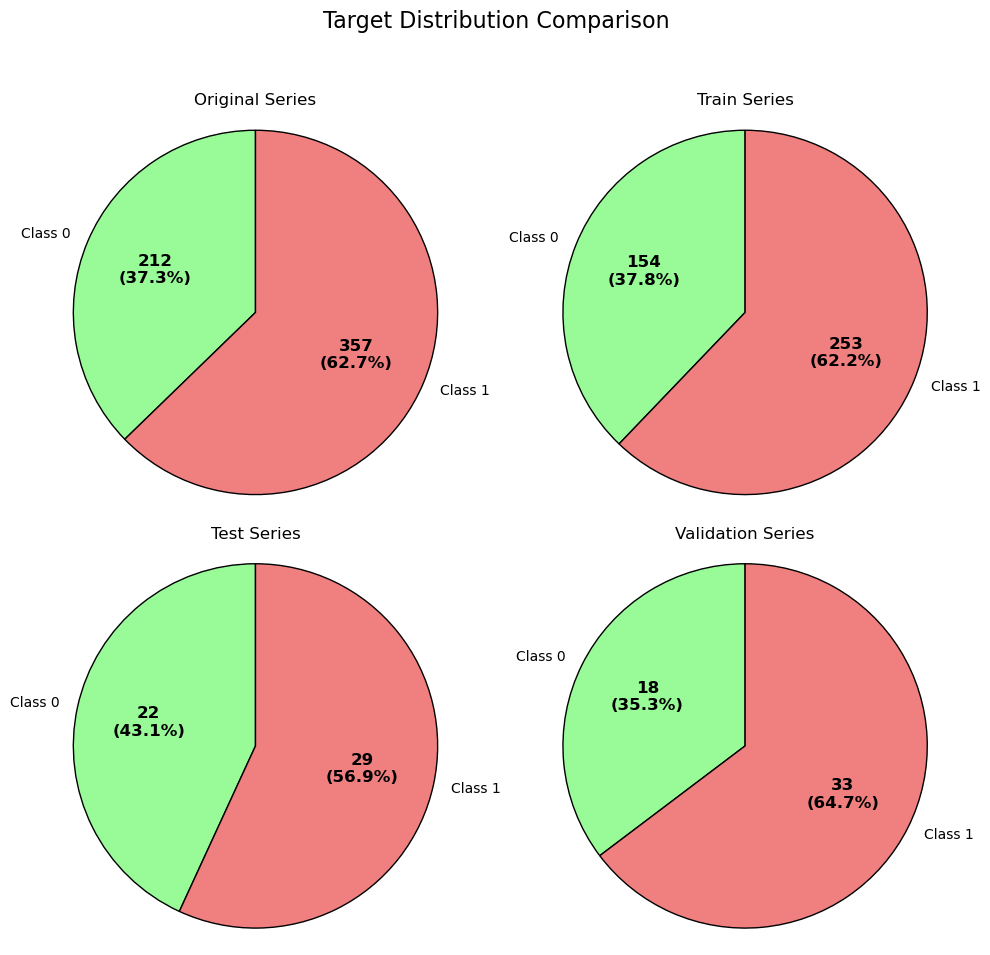

In [106]:
eda_target_distribution(y_origin, y_train['target'], y_test['target'], y_validation['target'])


<section id="DistributionsResults">
    <h3> 4.4. Variables Distributions </h3>
</section>


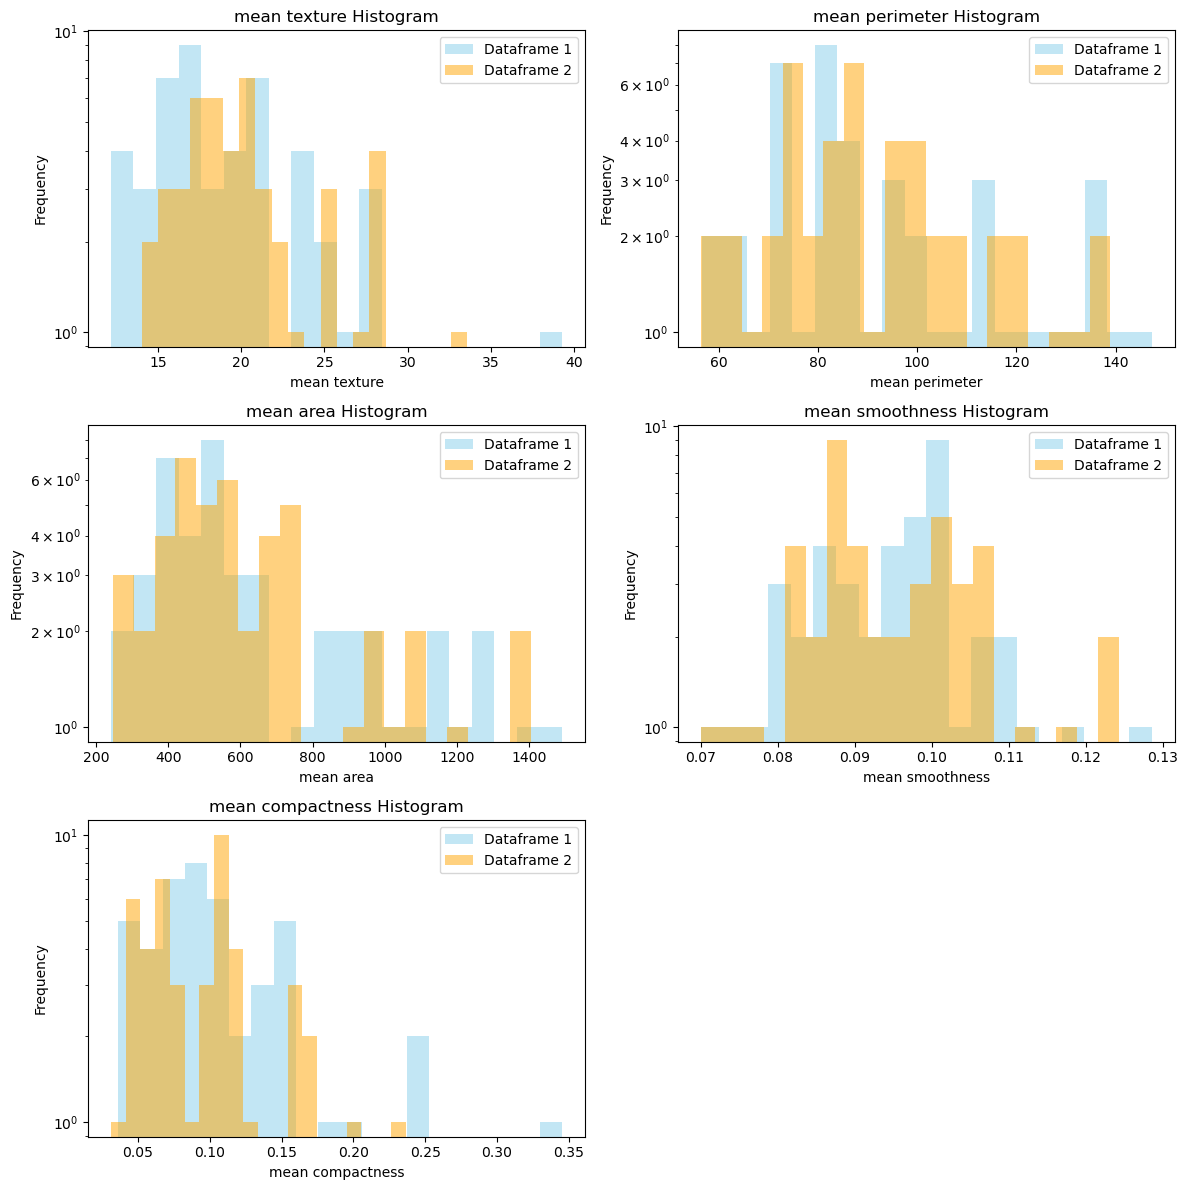

In [158]:
eda_variables_distributions(X_test, X_validation, 1, 6)